<a href="https://colab.research.google.com/github/mariaeco/imersao-dados-desafio-final/blob/main/MachineLearning_NFBK_INHIBITOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
selected_compostos = pd.read_csv('https://github.com/mariaeco/imersao-dados-desafio-final/blob/main/Dados/selected_compostos.csv?raw=true')
selected_compostos

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_0054388ec,Controle,48,D1,Controle,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
1,id_0079af0fb,Controle,24,D1,Controle,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_00d575cfb,Controle,72,D1,Controle,-0.6723,-0.1206,0.3467,-0.6395,-0.3117,1.2260,0.5376,0.4072,0.1072,0.2999,-0.5951,0.3314,-0.6563,-0.5825,-0.3253,-0.2861,1.8600,-0.2175,0.0644,-0.8179,0.5433,1.2210,-0.3418,0.0000,1.5970,0.3848,0.9079,-0.8118,-0.0735,-0.7087,0.3599,-0.2125,0.2554,0.1326,-1.0840,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
3,id_01b05de6c,Controle,48,D1,Controle,-0.3176,0.8375,-0.3773,0.5555,-0.4877,0.3413,-0.8204,-1.1320,1.0220,2.8340,1.5950,-0.4357,2.4850,0.0169,0.3497,0.2446,0.9030,1.0480,-0.0236,0.1287,-0.2542,-0.9599,-1.2090,0.8248,1.2270,0.9403,1.2220,0.7952,0.0654,0.1419,0.4826,-0.3608,-1.2470,0.8987,-1.6590,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_01f1c58a2,Controle,72,D1,Controle,1.1220,0.7841,-0.4374,-0.0314,-0.4130,0.5947,0.8534,0.0790,0.3800,-0.2035,0.2127,-0.4461,1.0430,0.2279,0.0566,0.0000,-0.3716,0.1550,0.3925,-0.0826,0.1344,1.5450,-0.3988,0.7190,0.6027,-0.7236,0.9727,-0.7076,0.7918,-0.4296,-0.6394,0.1831,0.5052,0.0070,-0.6597,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,id_7178e42ef,Tratamento,24,D1,f60388237,0.2693,0.9886,0.1210,-0.4752,-0.3997,-1.7820,-1.0060,1.3100,-0.4478,1.4990,-1.2080,-1.7410,0.8301,-0.1715,-1.9990,0.0348,-0.7874,0.0087,0.1693,0.7240,-1.5570,-0.0800,-0.9423,-0.1714,-0.3942,-0.1990,0.5888,-1.3240,-0.7402,-0.2822,-0.2708,0.1447,0.5850,-0.4957,1.1590,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
2694,id_b810ccd1c,Tratamento,48,D1,f60388237,-0.1013,0.1885,-0.1874,0.5962,-0.0206,-0.0087,-1.2070,0.8762,-0.5401,-1.1610,0.6889,0.0460,-0.5643,-0.6220,-0.7289,0.4890,-0.3350,0.4488,0.2506,-0.0421,-0.4553,0.1079,0.3494,0.0000,-0.3316,-0.2495,0.5952,0.1892,-0.3113,-0

In [ ]:
# Deixando só os compostos que tiveram efeito, analisados no colab X
#selected_compostos = selected_compostos.query('composto == "Controle" | composto == "87d714366" |composto == "b5e8fd5b5"|composto == "91dc8bab8"')
#selected_compostos

In [ ]:
selected_compostos.ativo_moa.unique()

array([False,  True])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = selected_compostos.select_dtypes('float64')
y = selected_compostos['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=1)

modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.9740740740740741

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.6907407407407408

In [ ]:
selected_compostos['ativo_moa'].value_counts(normalize=True)

False    0.691623
True     0.308377
Name: ativo_moa, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier


x = selected_compostos.select_dtypes('float64')
y = selected_compostos['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=1)

modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.9425925925925925

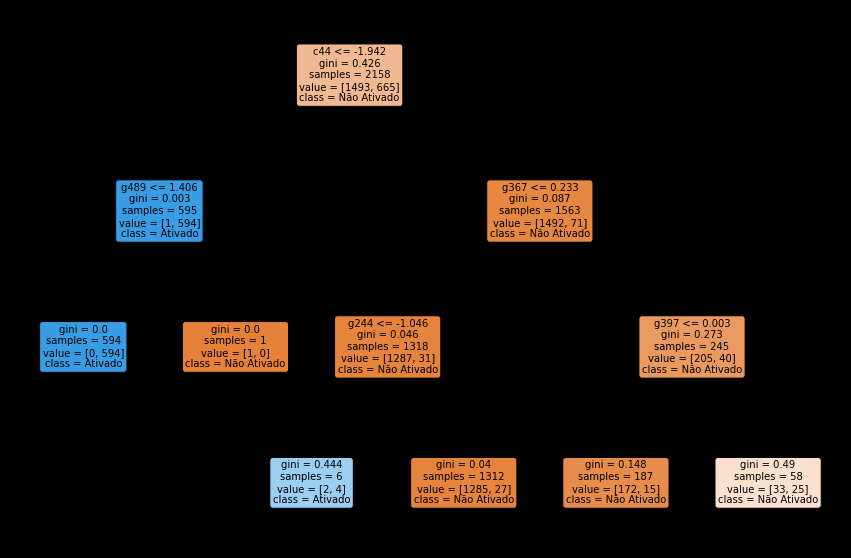

In [ ]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(15, 10), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativado', 'Ativado'])

plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier


x = selected_compostos.select_dtypes('float64')
y = selected_compostos['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

teste=[]
treino=[]
for i in range(1,15):
    modelo_arvore = DecisionTreeClassifier(max_depth = i)
    modelo_arvore.fit(x_treino, y_treino)
    teste.append(modelo_arvore.score(x_teste, y_teste))
    treino.append(modelo_arvore.score(x_treino, y_treino))

In [ ]:
teste

[0.9666666666666667,
 0.9666666666666667,
 0.9611111111111111,
 0.9592592592592593,
 0.9518518518518518,
 0.9481481481481482,
 0.9481481481481482,
 0.9444444444444444,
 0.9518518518518518,
 0.95,
 0.95,
 0.95,
 0.95,
 0.9462962962962963]

In [ ]:
treino

[0.9606116774791473,
 0.9610750695088045,
 0.9620018535681186,
 0.9726598702502317,
 0.9796107506950881,
 0.9842446709916589,
 0.9865616311399444,
 0.9870250231696015,
 0.9874884151992586,
 0.9879518072289156,
 0.9884151992585728,
 0.9888785912882299,
 0.9893419833178869,
 0.989805375347544]

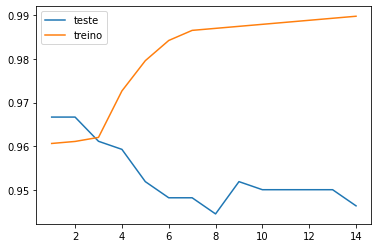

In [ ]:
sns.lineplot(x=range(1,15), y = teste, label='teste')
sns.lineplot(x=range(1,15), y = treino, label='treino')

In [ ]:
pd.get_dummies(selected_compostos['tratamento'])

,Controle,Tratamento
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
2693,0,1
2694,0,1
2695,0,1
2696,0,1


In [ ]:
pd.get_dummies(selected_compostos, columns=['tratamento', 'dose', 'tempo'])

,id,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,...,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa,tratamento_Controle,tratamento_Tratamento,dose_D1,dose_D2,tempo_24,tempo_48,tempo_72
0,id_0054388ec,Controle,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,-0.7060,-0.8653,0.0799,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,0,1,0,0,1,0
1,id_0079af0fb,Controle,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,0.2441,0.8413,-0.5191,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,0,1,0,1,0,0
2,id_00d575cfb,Controle,-0.6723,-0.1206,0.3467,-0.6395,-0.3117,1.2260,0.5376,0.4072,0.1072,0.2999,-0.5951,0.3314,-0.6563,-0.5825,-0.3253,-0.2861,1.8600,-0.2175,0.0644,-0.8179,0.5433,1.2210,-0.3418,0.0000,1.5970,0.3848,0.9079,-0.8118,-0.0735,-0.7087,0.3599,-0.2125,0.2554,0.1326,-1.0840,0.5991,-0.7334,0.6941,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,0,1,0,0,0,1
3,id_01b05de6c,Controle,-0.3176,0.8375,-0.3773,0.5555,-0.4877,0.3413,-0.8204,-1.1320,1.0220,2.8340,1.5950,-0.4357,2.4850,0.0169,0.3497,0.2446,0.9030,1.0480,-0.0236,0.1287,-0.2542,-0.9599,-1.2090,0.8248,1.2270,0.9403,1.2220,0.7952,0.0654,0.1419,0.4826,-0.3608,-1.2470,0.8987,-1.6590,-0.0045,-0.1820,0.4004,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,0,1,0,0,1,0
4,id_01f1c58a2,Controle,1.1220,0.7841,-0.4374,-0.0314,-0.4130,0.5947,0.8534,0.0790,0.3800,-0.2035,0.2127,-0.4461,1.0430,0.2279,0.0566,0.0000,-0.3716,0.1550,0.3925,-0.0826,0.1344,1.5450,-0.3988,0.7190,0.6027,-0.7236,0.9727,-0.7076,0.7918,-0.4296,-0.6394,0.1831,0.5052,0.0070,-0.6597,0.7997,0.5538,-1.1180,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,id_7178e42ef,f60388237,0.2693,0.9886,0.1210,-0.4752,-0.3997,-1.7820,-1.0060,1.3100,-0.4478,1.4990,-1.2080,-1.7410,0.8301,-0.1715,-1.9990,0.0348,-0.7874,0.0087,0.1693,0.7240,-1.5570,-0.0800,-0.9423,-0.1714,-0.3942,-0.1990,0.5888,-1.3240,-0.7402,-0.2822,-0.2708,0.1447,0.5850,-0.4957,1.1590,0.2012,0.7588,-0.8184,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True,0,1,1,0,1,0,0
2694,id_b810ccd1c,f60388237,-0.1013,0.1885,-0.1874,0.5962,-0.0206,-0.0087,-1.2070,0.8762,-0.5401,-1.1610,0.6889,0.0460,-0.5643,-0.6220,-0.7289,0.4890,-0.3350,0.4488,0.2506,-0.0421,-0.4553,0.1079,0.3494,0.0000,-0.3316,-0.2495,0.5952,0.1892,-0.3113,-0.7195,0.2698,-0.8941,0.5011,0.3784,-0.2010,0.4532,0.1972,-0.3893,...,0,0,0,

In [ ]:
selected_compostos.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)

,tratamento,tempo,dose,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,Controle,48,D1,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,-0.7060,-0.8653,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Controle,24,D1,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,0.2441,0.8413,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Controle,72,D1,-0.6723,-0.1206,0.3467,-0.6395,-0.3117,1.2260,0.5376,0.4072,0.1072,0.2999,-0.5951,0.3314,-0.6563,-0.5825,-0.3253,-0.2861,1.8600,-0.2175,0.0644,-0.8179,0.5433,1.2210,-0.3418,0.0000,1.5970,0.3848,0.9079,-0.8118,-0.0735,-0.7087,0.3599,-0.2125,0.2554,0.1326,-1.0840,0.5991,-0.7334,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Controle,48,D1,-0.3176,0.8375,-0.3773,0.5555,-0.4877,0.3413,-0.8204,-1.1320,1.0220,2.8340,1.5950,-0.4357,2.4850,0.0169,0.3497,0.2446,0.9030,1.0480,-0.0236,0.1287,-0.2542,-0.9599,-1.2090,0.8248,1.2270,0.9403,1.2220,0.7952,0.0654,0.1419,0.4826,-0.3608,-1.2470,0.8987,-1.6590,-0.0045,-0.1820,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Controle,72,D1,1.1220,0.7841,-0.4374,-0.0314,-0.4130,0.5947,0.8534,0.0790,0.3800,-0.2035,0.2127,-0.4461,1.0430,0.2279,0.0566,0.0000,-0.3716,0.1550,0.3925,-0.0826,0.1344,1.5450,-0.3988,0.7190,0.6027,-0.7236,0.9727,-0.7076,0.7918,-0.4296,-0.6394,0.1831,0.5052,0.0070,-0.6597,0.7997,0.5538,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,Tratamento,24,D1,0.2693,0.9886,0.1210,-0.4752,-0.3997,-1.7820,-1.0060,1.3100,-0.4478,1.4990,-1.2080,-1.7410,0.8301,-0.1715,-1.9990,0.0348,-0.7874,0.0087,0.1693,0.7240,-1.5570,-0.0800,-0.9423,-0.1714,-0.3942,-0.1990,0.5888,-1.3240,-0.7402,-0.2822,-0.2708,0.1447,0.5850,-0.4957,1.1590,0.2012,0.7588,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2694,Tratamento,48,D1,-0.1013,0.1885,-0.1874,0.5962,-0.0206,-0.0087,-1.2070,0.8762,-0.5401,-1.1610,0.6889,0.0460,-0.5643,-0.6220,-0.7289,0.4890,-0.3350,0.4488,0.2506,-0.0421,-0.4553,0.1079,0.3494,0.0000,-0.3316,-0.2495,0.5952,0.1892,-0.3113,-0.7195,0.2698,-0.8941,0.5011,0.3784,-0.2010,0.453

In [ ]:
from sklearn.ensemble import RandomForestClassifier


x = selected_compostos.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = selected_compostos['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

1.0